___

<a href='http://www.pieriandata.com'> <img src='../Pierian_Data_Logo.png' /></a>
___

# Finance Data Project 

In this data project we will focus on exploratory data analysis of stock prices. Keep in mind, this project is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is extremely challenging because it will introduce a lot of new concepts and have you looking things up on your own (we'll point you in the right direction) to try to solve the tasks issued. Feel free to just go through the solutions lecture notebook and video as a "walkthrough" project if you don't want to have to look things up yourself. You'll still learn a lot that way! **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2016.

## Get the Data

In this section we will learn how to use pandas to directly read data from Google finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**), or just follow along with the video lecture.*

### The Imports

Already filled out for you.

In [1]:
import pandas as pd

In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import datetime
%matplotlib inline

## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2006 to Jan 1st 2016 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/remote_data.html) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)

### WARNING: MAKE SURE TO CHECK THE LINK ABOVE FOR THE LATEST WORKING API. "google" MAY NOT ALWAYS WORK. 
------------
### We also provide pickle file in the article lecture right before the video lectures.

In [3]:
import yfinance as yf

In [4]:
start = datetime.datetime(2006, 1, 1)
end = datetime.datetime(2016, 1, 1)

# Bank of America
BAC = yf.download("BAC", start=start, end=end, auto_adjust=True)

[*********************100%***********************]  1 of 1 completed


In [5]:
C = yf.download("C", start=start, end=end, auto_adjust=True)
# Citigroup
GS = yf.download("GS", start=start, end=end, auto_adjust=True)
# Goldman Sachs
JPM = yf.download("JPM", start=start, end=end, auto_adjust=True)
# JP Morgan Chase
MS = yf.download("MS", start=start, end=end, auto_adjust=True)
# Morgan Stanley
WFC = yf.download("WFC", start=start, end=end, auto_adjust=True)
# Wells Fargo

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [ ]:
#### Si lo quiero hacer itereando :
# Diccionario con nombres y símbolos
# banks = {
#     "CitiGroup": "C",
#     "Goldman Sachs": "GS",
#     "JPMorgan Chase": "JPM",
#     "Morgan Stanley": "MS",
#     "Wells Fargo": "WFC",
#     "Bank of America": "BAC"
# }

# # Descargar y mostrar datos
# bank_data = {}

# for name, symbol in banks.items():
#     print(f"Descargando datos de {name} ({symbol})...")
#     data = yf.download(symbol, start=start, end=end)
#     bank_data[name] = data

# # Por ejemplo, mostrar los primeros 5 registros de JPMorgan Chase
# print("\nPrimeros datos de JPMorgan Chase:")
# print(bank_data["JPMorgan Chase"].head())


** Create a list of the ticker symbols (as strings) in alphabetical order. Call this list: tickers**

In [6]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']

** Use pd.concat to concatenate the bank dataframes together to a single data frame called bank_stocks. Set the keys argument equal to the tickers list. Also pay attention to what axis you concatenate on.**

In [7]:
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC], axis=1)
bank_stocks.head()

Price,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume,...,Close,High,Low,Open,Volume,Close,High,Low,Open,Volume
Ticker,BAC,BAC,BAC,BAC,BAC,C,C,C,C,C,...,MS,MS,MS,MS,MS,WFC,WFC,WFC,WFC,WFC
Date,,,,,,,,,,,,,,,,,,,,,
2006-01-03,31.173676,31.239889,30.557883,31.067730,16296700,324.013214,324.604835,316.256363,322.106871,1537600,...,32.190907,32.290278,31.324165,31.561551,5377000,18.778103,18.822252,18.363101,18.601507,11016400
2006-01-04,30.842609,31.279624,30.756530,31.120708,17757900,318.031158,322.764164,317.833958,321.186502,1870960,...,32.212990,32.726410,32.212990,32.406214,7977800,18.560303,18.731012,18.463174,18.719239,10870000
2006-01-05,30.882339,31.008148,30.670454,30.842613,14970700,319.608917,320.660679,318.162715,318.425655,1143160,...,32.301334,32.345501,32.030824,32.323417,5778000,18.539709,18.575028,18.430807,18.542652,10158000
2006-01-06,30.835995,31.061123,30.690322,30.988287,12599800,319.608917,321.449520,316.847993,321.318040,1370210,...,32.334438,32.489016,32.047364,32.444852,6889800,18.648611,18.704533,18.474958,18.589745,8403800
2006-01-09,30.855841,31.100835,30.696928,30.935300,15619400,318.096832,320.397595,317.505212,319.477294,1680740,...,32.676727,32.731935,32.362050,32.367572,4144500,18.645664,18.733963,18.575026,18.645664,5619600


In [8]:
data_dict = {ticker: yf.download(ticker, start=start, end=end) for ticker in tickers}

bank_stocks = pd.concat(data_dict.values(), keys=data_dict.keys(), axis=1) 

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed

YF.download() has changed argument auto_adjust default to True


** Set the column name levels (this is filled out for you):**

In [9]:
bank_stocks.columns.names = ['Bank Ticker', 'Stock Info', 'Attribute']
#bank_stocks.columns.names = ['Bank Ticker', 'Stock Info']
bank_stocks.head()

Bank Ticker        BAC                                                      C  \
Stock Info       Close       High        Low       Open    Volume       Close   
Attribute          BAC        BAC        BAC        BAC       BAC           C   
Date                                                                            
2006-01-03   31.173676  31.239889  30.557883  31.067730  16296700  324.013214   
2006-01-04   30.842609  31.279624  30.756530  31.120708  17757900  318.031158   
2006-01-05   30.882339  31.008148  30.670454  30.842613  14970700  319.608917   
2006-01-06   30.835995  31.061123  30.690322  30.988287  12599800  319.608917   
2006-01-09   30.855841  31.100835  30.696928  30.935300  15619400  318.096832   

Bank Ticker                                               ...         MS  \
Stock Info         High         Low        Open   Volume  ...      Close   
Attribute             C           C           C        C  ...         MS   
Date                                                      ...              
2006-01-03   324.604835  316.256363  322.106871  1537600  ...  32.190907   
2006-01-04   322.764164  317.833958  321.186502  1870960  ...  32.212990   
2006-01-05   320.660679  318.162715  318.425655  1143160  ...  32.301334   
2006-01-06   321.449520  316.847993  321.318040  1370210  ...  32.334438   
2006-01-09   320.397595  317.505212  319.477294  1680740  ...  32.676727   

Bank Ticker                                                  WFC             \
Stock Info        High        Low       Open   Volume      Close       High   
Attribute           MS         MS         MS       MS        WFC        WFC   
Date                                                                          
2006-01-03   32.290278  31.324165  31.561551  5377000  18.778103  18.822252   
2006-01-04   32.726410  32.212990  32.406214  7977800  18.560303  18.731012   
2006-01-05   32.345501  32.030824  32.323417  5778000  18.539709  18.575028   
2006-01-06   32.489016  32.047364  32.444852  6889800  18.648611  18.704533   
2006-01-09   32.731935  32.362050  32.367572  4144500  18.645664  18.733963   

Bank Ticker                                  
Stock Info         Low       Open    Volume  
Attribute          WFC        WFC       WFC  
Date                                         
2006-01-03   18.363101  18.601507  11016400  
2006-01-04   18.463174  18.719239  10870000  
2006-01-05   18.430807  18.542652  10158000  
2006-01-06   18.474958  18.589745   8403800  
2006-01-09   18.575026  18.645664   5619600  

[5 rows x 30 columns]

** Check the head of the bank_stocks dataframe.**

Bank Ticker    BAC                                     C                       \
Stock Info    Open   High    Low  Close    Volume   Open   High    Low  Close   
Date                                                                            
2006-01-03   46.92  47.18  46.15  47.08  16296700  490.0  493.8  481.1  492.9   
2006-01-04   47.00  47.24  46.45  46.58  17757900  488.6  491.0  483.5  483.8   
2006-01-05   46.58  46.83  46.32  46.64  14970900  484.4  487.8  484.0  486.2   
2006-01-06   46.80  46.91  46.35  46.57  12599800  488.8  489.0  482.0  486.2   
2006-01-09   46.72  46.97  46.36  46.60  15620000  486.0  487.4  483.0  483.9   

Bank Ticker             ...        MS                                  WFC  \
Stock Info    Volume    ...      Open   High    Low  Close   Volume   Open   
Date                    ...                                                  
2006-01-03   1537660    ...     57.17  58.49  56.74  58.31  5377000  31.60   
2006-01-04   1871020    ...     58.70  59.28  58.35  58.35  7977800  31.80   
2006-01-05   1143160    ...     58.55  58.59  58.02  58.51  5778000  31.50   
2006-01-06   1370250    ...     58.77  58.85  58.05  58.57  6889800  31.58   
2006-01-09   1680740    ...     58.63  59.29  58.62  59.19  4144500  31.68   

Bank Ticker                                 
Stock Info    High    Low  Close    Volume  
Date                                        
2006-01-03   31.98  31.20  31.90  11016400  
2006-01-04   31.82  31.36  31.53  10871000  
2006-01-05   31.56  31.31  31.50  10158000  
2006-01-06   31.78  31.38  31.68   8403800  
2006-01-09   31.82  31.56  31.68   5619600  

[5 rows x 30 columns]

# EDA

Let's explore the data a bit! Before continuing, I encourage you to check out the documentation on [Multi-Level Indexing](http://pandas.pydata.org/pandas-docs/stable/advanced.html) and [Using .xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html).
Reference the solutions if you can not figure out how to use .xs(), since that will be a major part of this project.

** What is the max Close price for each bank's stock throughout the time period?**

In [ ]:
for tick in tickers: #['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
    print(bank_stocks[tick]['Close'].max()) 

Attribute
BAC    37.699585
dtype: float64
Attribute
C    386.292755
dtype: float64
Attribute
GS    186.076126
dtype: float64
Attribute
JPM    53.603722
dtype: float64
Attribute
MS    50.462822
dtype: float64
Attribute
WFC    44.268093
dtype: float64


In [11]:
bank_stocks.xs(key='Close', level='Stock Info', axis=1).max()

Bank Ticker  Attribute
BAC          BAC           37.699585
C            C            386.292755
GS           GS           186.076126
JPM          JPM           53.603722
MS           MS            50.462822
WFC          WFC           44.268093
dtype: float64

** Create a new empty DataFrame called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

** We can use pandas pct_change() method on the Close column to create a column representing this return value. Create a for loop that goes and for each Bank Stock Ticker creates this returns column and set's it as a column in the returns DataFrame.**

In [12]:
returns = pd.DataFrame()

In [133]:
for tick in tickers:
    returns[tick + ' Return'] = bank_stocks[tick]['Close'].pct_change()

returns.head() # Forma de hacerlo pero en bucle

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010621,-0.018462,-0.013813,-0.005771,0.000686,-0.011598
2006-01-05,0.001288,0.004961,-0.000393,0.003028,0.002742,-0.001110
2006-01-06,-0.001500,0.000000,0.014169,0.007046,0.001026,0.005874
2006-01-09,0.000643,-0.004730,0.012031,0.016242,0.010585,-0.000158


In [15]:
returns = bank_stocks.xs(key='Close', level='Stock Info', axis=1).pct_change()
returns.head()

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Attribute,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.005772,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002743,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012031,0.016242,0.010586,-0.000158


,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.000951
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005714
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,0.000000


** Create a pairplot using seaborn of the returns dataframe. What stock stands out to you? Can you figure out why?**

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt 

c:\Users\Erick J. Sarante\Desktop\Erick_Curso\Data_Sci_2\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Erick J. Sarante\Desktop\Erick_Curso\Data_Sci_2\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Erick J. Sarante\Desktop\Erick_Curso\Data_Sci_2\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Erick J. Sarante\Desktop\Erick_Curso\Data_Sci_2\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  func(x=vector, **plot_kwargs)
c:\Users\Erick J. Sarante\Desktop\Erick_Curso\Data_Sci_2\Lib\site-packages\seaborn\axisgrid.py:1513: UserWarning: Ignoring `palette` because no `hue` variable h

Text(0.5, 1.02, 'Pairplot of Bank Stock Returns')

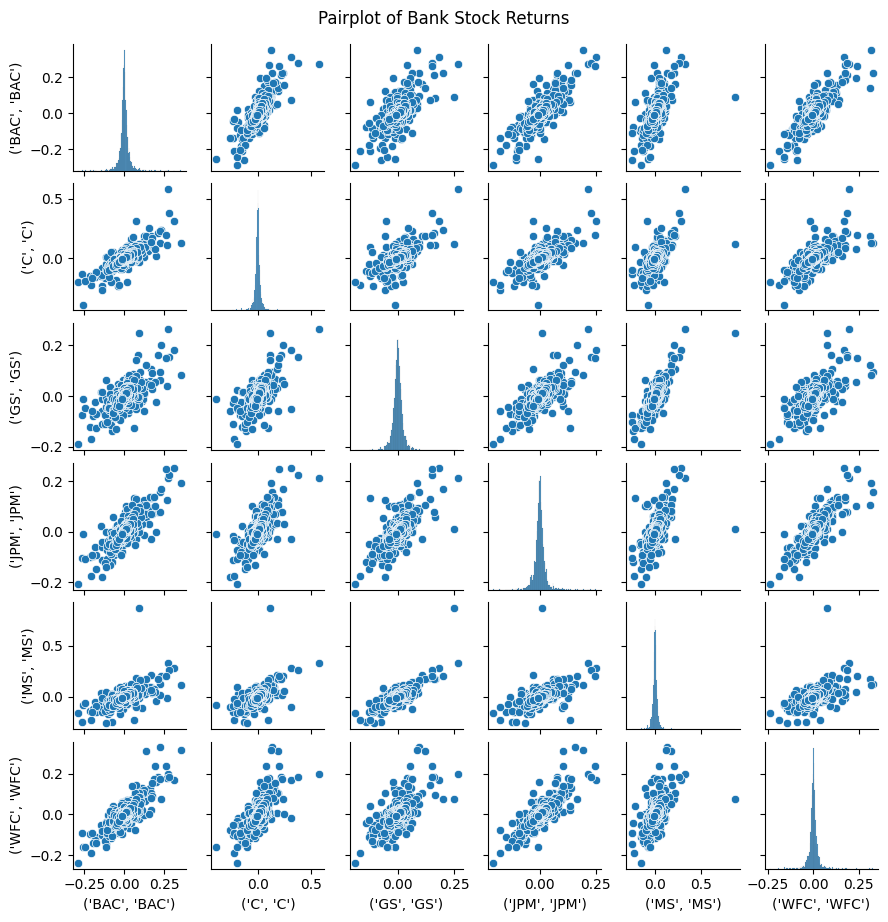

In [16]:
sns.pairplot(returns, diag_kind='hist', palette='coolwarm', height=1.5)
plt.suptitle('Pairplot of Bank Stock Returns', y=1.02)

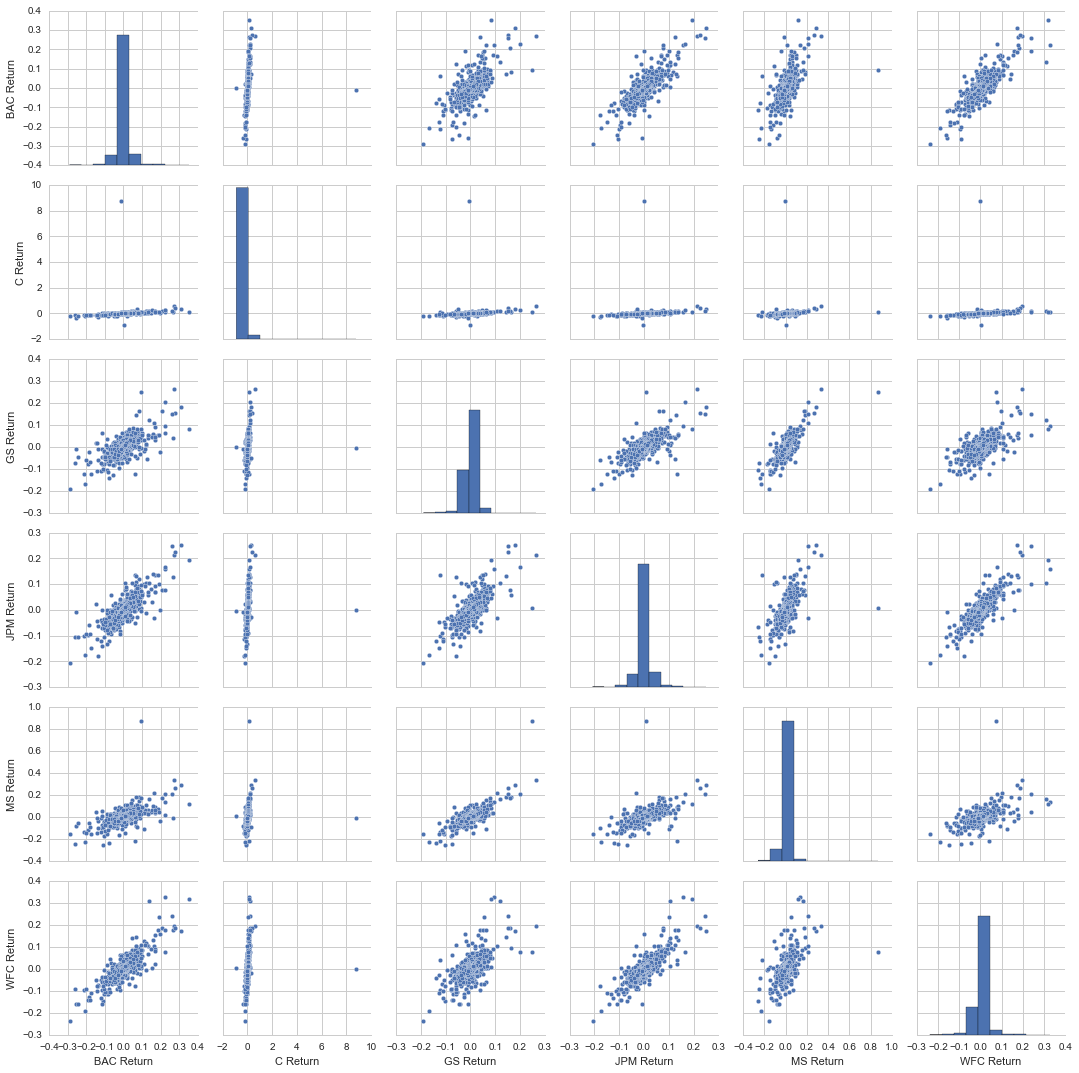

* See solution for details about Citigroup behavior....

** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. You should notice that 4 of the banks share the same day for the worst drop, did anything significant happen that day?**

In [140]:
returns.idxmin(axis=0).head(10)


Bank Ticker  Attribute
BAC          BAC         2009-01-20
C            C           2009-02-27
GS           GS          2009-01-20
JPM          JPM         2009-01-20
MS           MS          2008-10-09
WFC          WFC         2009-01-20
dtype: datetime64[ns]

BAC Return   2009-01-20
C Return     2011-05-06
GS Return    2009-01-20
JPM Return   2009-01-20
MS Return    2008-10-09
WFC Return   2009-01-20
dtype: datetime64[ns]

In [141]:
returns.idxmax(axis=0).head(10)

Bank Ticker  Attribute
BAC          BAC         2009-04-09
C            C           2008-11-24
GS           GS          2008-11-24
JPM          JPM         2009-01-21
MS           MS          2008-10-13
WFC          WFC         2008-07-16
dtype: datetime64[ns]

** You should have noticed that Citigroup's largest drop and biggest gain were very close to one another, did anythign significant happen in that time frame? **

* See Solution for details

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? Which would you classify as the riskiest for the year 2015?**

In [142]:
returns.loc['2015-01-01':'2015-12-31'].std(axis=0)

Bank Ticker  Attribute
BAC          BAC          0.016174
C            C            0.015288
GS           GS           0.014043
JPM          JPM          0.014006
MS           MS           0.016287
WFC          WFC          0.012552
dtype: float64

In [143]:
returns.std(axis=0).head(10)

Bank Ticker  Attribute
BAC          BAC          0.036659
C            C            0.038672
GS           GS           0.025386
JPM          JPM          0.027675
MS           MS           0.037717
WFC          WFC          0.030195
dtype: float64

In [ ]:
# claramente ahora no es el caso dado que ha cambiado los retornos de los bancos. 

In [144]:
returns.head(10)

Bank Ticker,BAC,C,GS,JPM,MS,WFC
Attribute,BAC,C,GS,JPM,MS,WFC
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010621,-0.018462,-0.013813,-0.005771,0.000686,-0.011598
2006-01-05,0.001288,0.004961,-0.000393,0.003028,0.002742,-0.001110
2006-01-06,-0.001500,0.000000,0.014169,0.007046,0.001026,0.005874
2006-01-09,0.000643,-0.004730,0.012031,0.016242,0.010585,-0.000158
2006-01-10,-0.008369,0.003100,0.012577,0.001475,0.000507,-0.000789
2006-01-11,-0.002380,0.009065,-0.000454,-0.000737,0.010518,0.005213
2006-01-12,-0.006508,0.001021,0.002122,-0.018427,-0.001679,-0.011630


BAC Return    0.016163
C Return      0.015289
GS Return     0.014046
JPM Return    0.014017
MS Return     0.016249
WFC Return    0.012591
dtype: float64

** Create a distplot using seaborn of the 2015 returns for Morgan Stanley **

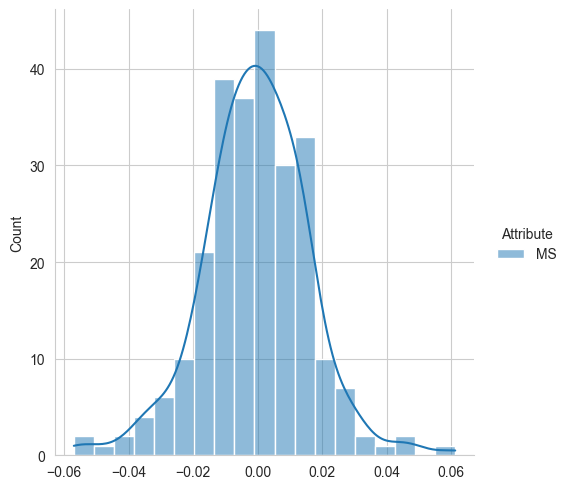

In [146]:
sns.displot(returns[returns.index.year==2015]['MS'], color='green', label='MS', kde=True)

/Users/marci/anaconda/lib/python3.5/site-packages/statsmodels/nonparametric/kdetools.py:20: VisibleDeprecationWarning:

using a non-integer number instead of an integer will result in an error in the future



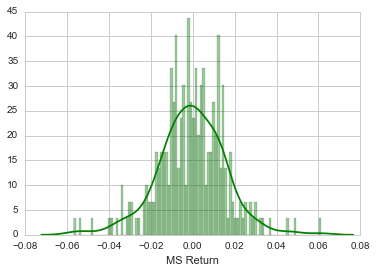

** Create a distplot using seaborn of the 2008 returns for CitiGroup **

array([[<Axes: title={'center': 'C'}>]], dtype=object)

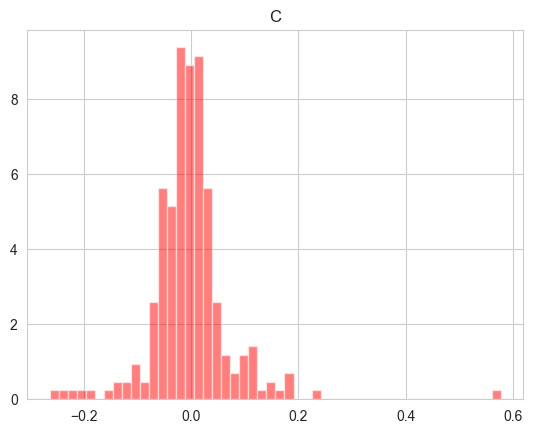

In [147]:
returns.loc[returns.index.year==2008]['C'].hist(bins=50, alpha=0.5, color='red', label='C', density=True)

____
# More Visualization

A lot of this project will focus on visualizations. Feel free to use any of your preferred visualization libraries to try to recreate the described plots below, seaborn, matplotlib, plotly and cufflinks, or just pandas.

### Imports

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

** Create a line plot showing Close price for each bank for the entire index of time. (Hint: Try using a for loop, or use [.xs](http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.xs.html) to get a cross section of the data.)**

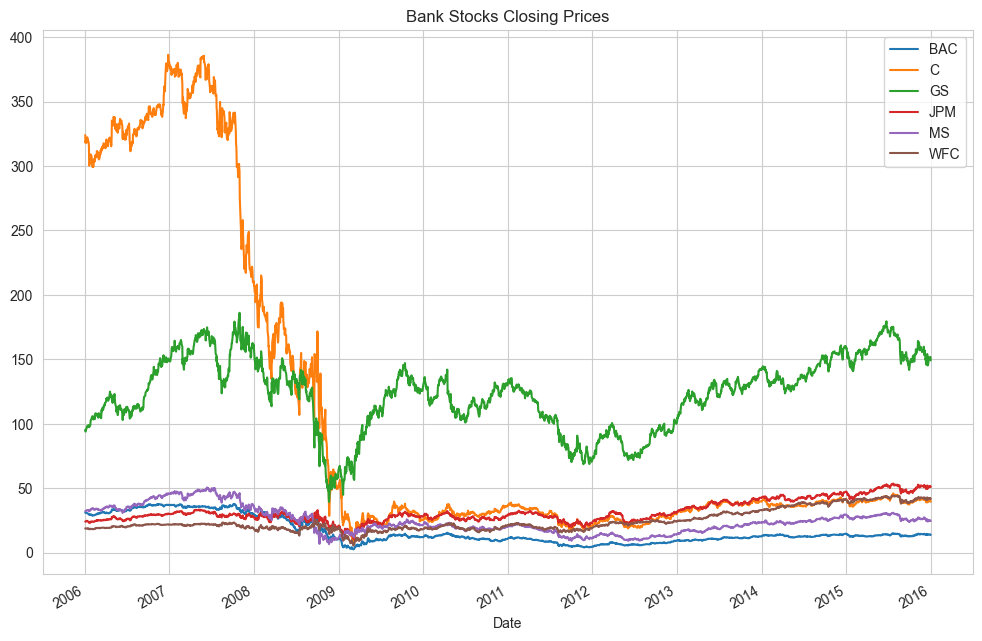

In [22]:
fig, ax = plt.subplots(figsize=(12, 8))  # Crear una sola figura y ejes

for tick in tickers:
    bank_stocks[tick]['Close'].plot(ax=ax, label=tick)  # Usar el mismo ax para todos

ax.set_title('Bank Stocks Closing Prices')
ax.legend()
plt.show()



<Axes: title={'center': 'Bank Stocks Price'}, xlabel='Date'>

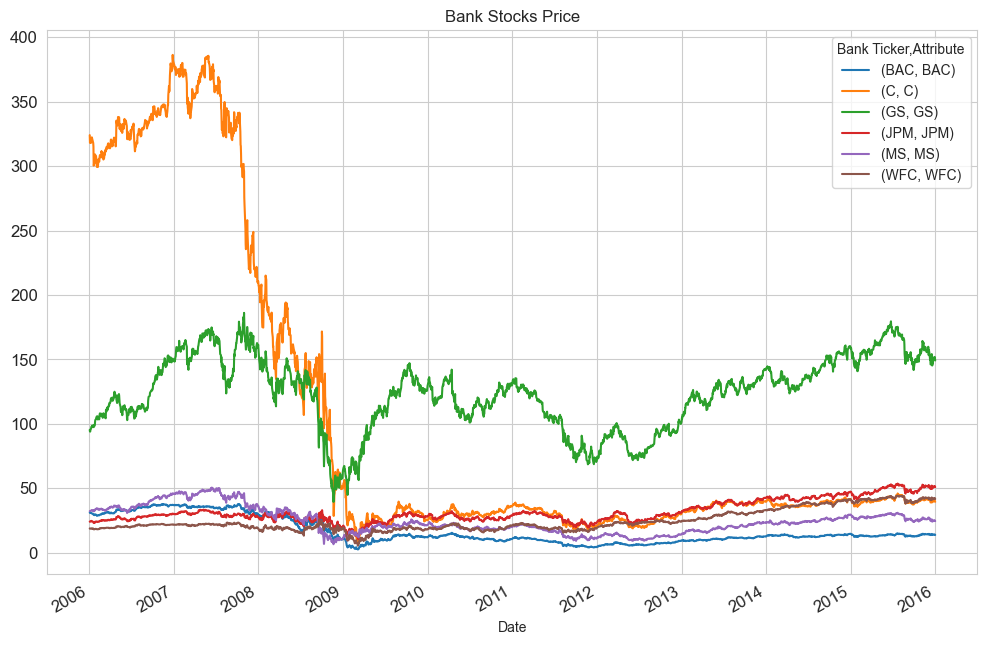

In [150]:
bank_stocks.xs(key='Close', level='Stock Info', axis=1).plot(figsize=(12,8), title='Bank Stocks Price', fontsize=12)

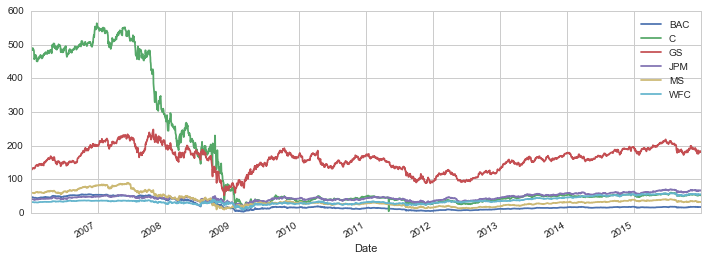

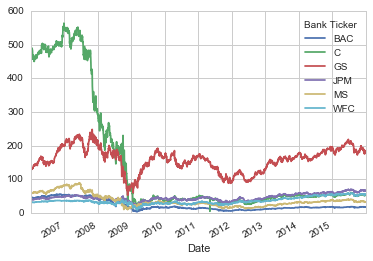

## Moving Averages

Let's analyze the moving averages for these stocks in the year 2008. 

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2008**

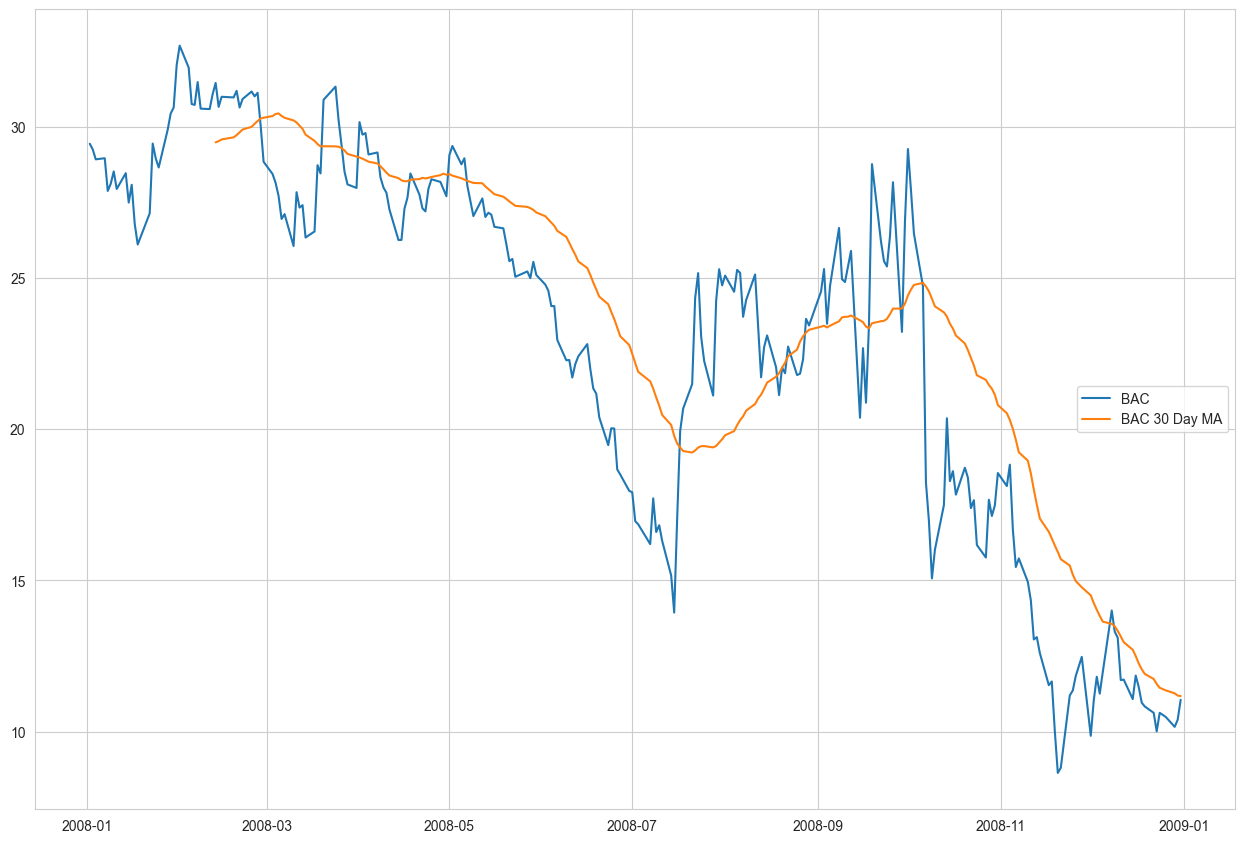

In [23]:
fig = plt.figure(figsize=(12, 8))

bank_stocks_subset = bank_stocks[bank_stocks.index.year==2008]

axes = fig.add_axes([0,0,1,1])
axes.plot(bank_stocks_subset['BAC'].xs(key='Close', level='Stock Info', axis=1))
axes.plot(bank_stocks_subset['BAC'].rolling(window=30).mean().xs(key='Close', level='Stock Info', axis=1))
plt.gca().axes.legend(['BAC', 'BAC 30 Day MA'], loc=5)




** Create a heatmap of the correlation between the stocks Close Price.**

<Axes: xlabel='Bank Ticker-Attribute', ylabel='Bank Ticker-Attribute'>

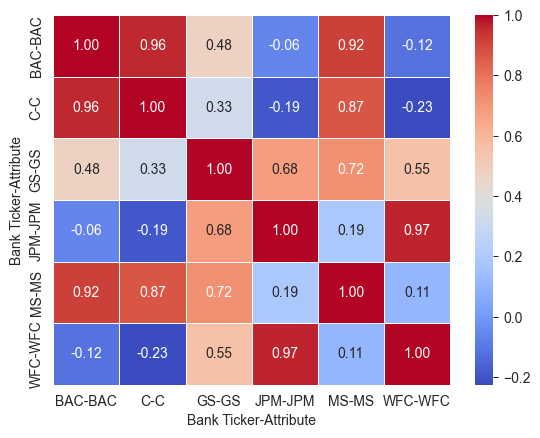

In [24]:
sns.heatmap(bank_stocks.xs(key='Close', level='Stock Info', axis=1).corr(), annot=True, cmap='coolwarm', linewidths=0.5, fmt='.2f')

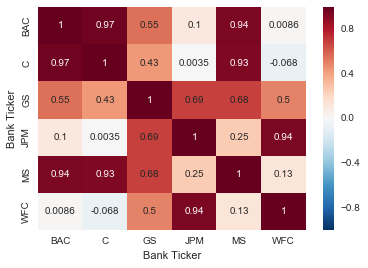

** Optional: Use seaborn's clustermap to cluster the correlations together:**

In [25]:
import scipy

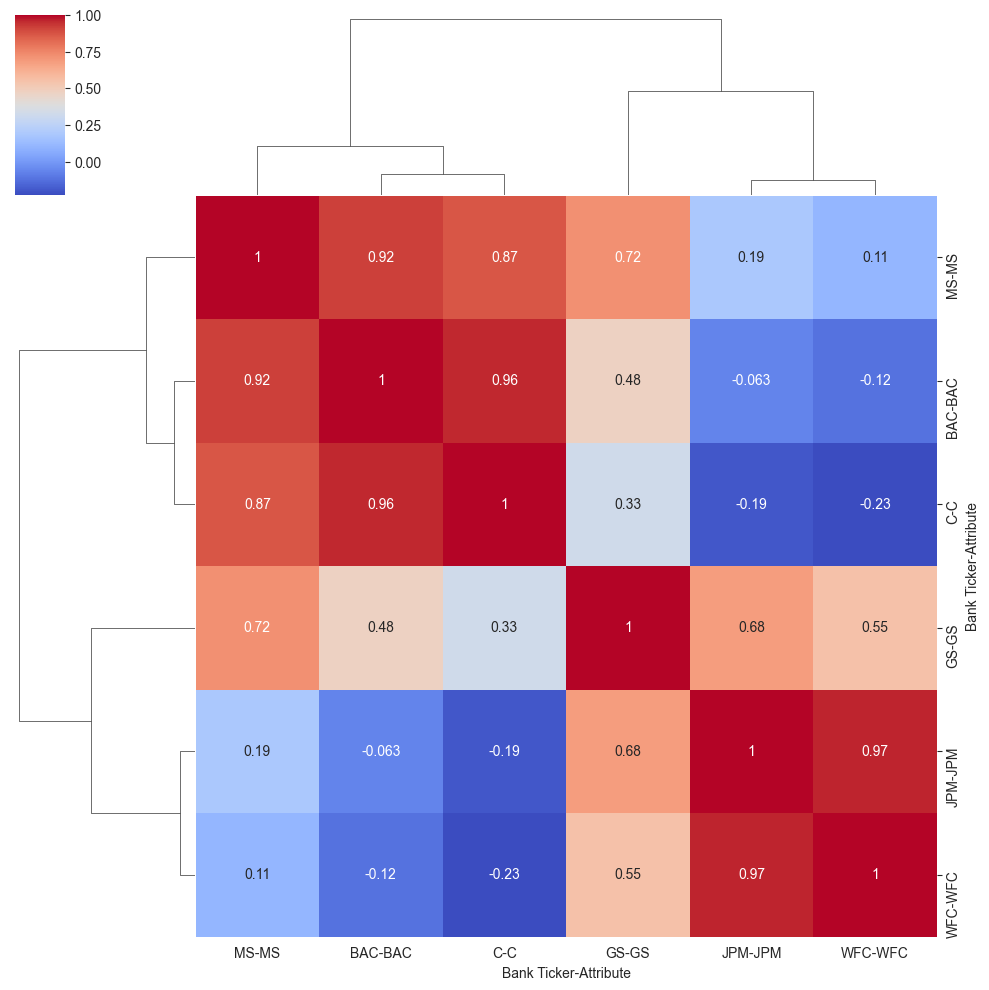

In [26]:
# Ensure scipy is installed
#%pip install scipy

# Generate the clustermap
sns.clustermap(bank_stocks.xs(key='Close', level='Stock Info', axis=1).corr(), annot=True, cmap='coolwarm')

# Part 2 (Optional)

In this second part of the project we will rely on the cufflinks library to create some Technical Analysis plots. This part of the project is experimental due to its heavy reliance on the cuffinks project, so feel free to skip it if any functionality is broken in the future.

** Use .iplot(kind='candle) to create a candle plot of Bank of America's stock from Jan 1st 2015 to Jan 1st 2016.**

In [27]:
import plotly.express as px
import plotly.graph_objects as go
import plotly.io as pio
pio.renderers.default = 'vscode'


In [26]:
list(pio.renderers)

['plotly_mimetype',
 'jupyterlab',
 'nteract',
 'vscode',
 'notebook',
 'notebook_connected',
 'kaggle',
 'azure',
 'colab',
 'cocalc',
 'databricks',
 'json',
 'png',
 'jpeg',
 'jpg',
 'svg',
 'pdf',
 'browser',
 'firefox',
 'chrome',
 'chromium',
 'iframe',
 'iframe_connected',
 'sphinx_gallery',
 'sphinx_gallery_png']

In [ ]:
# bac15 = BAC[['Open','High','Low','Close']].loc['2015-01-01':'2015-12-31']
# bac15.reset_index(inplace=True)
# bac15['Date'] = pd.to_datetime(bac15['Date'])

# fig = go.Figure(data=[go.Candlestick(x=bac15['Date'],
#                                      open=bac15['Open'],
#                                      high=bac15['High'],
#                                      low=bac15['Low'],
#                                      close=bac15['Close'])])
# fig.show()

In [28]:
Close = bank_stocks.loc['2015-01-01':'2016-01-01']['BAC'].xs(key='Close', level='Stock Info', axis=1)
high = bank_stocks.loc['2015-01-01':'2016-01-01']['BAC'].xs(key='High', level='Stock Info', axis=1)
low = bank_stocks.loc['2015-01-01':'2016-01-01']['BAC'].xs(key='Low', level='Stock Info', axis=1)  
open = bank_stocks.loc['2015-01-01':'2016-01-01']['BAC'].xs(key='Open', level='Stock Info', axis=1)
date = bank_stocks.loc['2015-01-01':'2016-01-01'].index
fig = go.Figure(data=[go.Candlestick(x=date,
                                     open=open['BAC'],
                                     high=high['BAC'],
                                     low=low['BAC'],
                                     close=Close['BAC'])])
fig.show()

<Axes: title={'center': 'Bank of America 2015'}, xlabel='Date'>

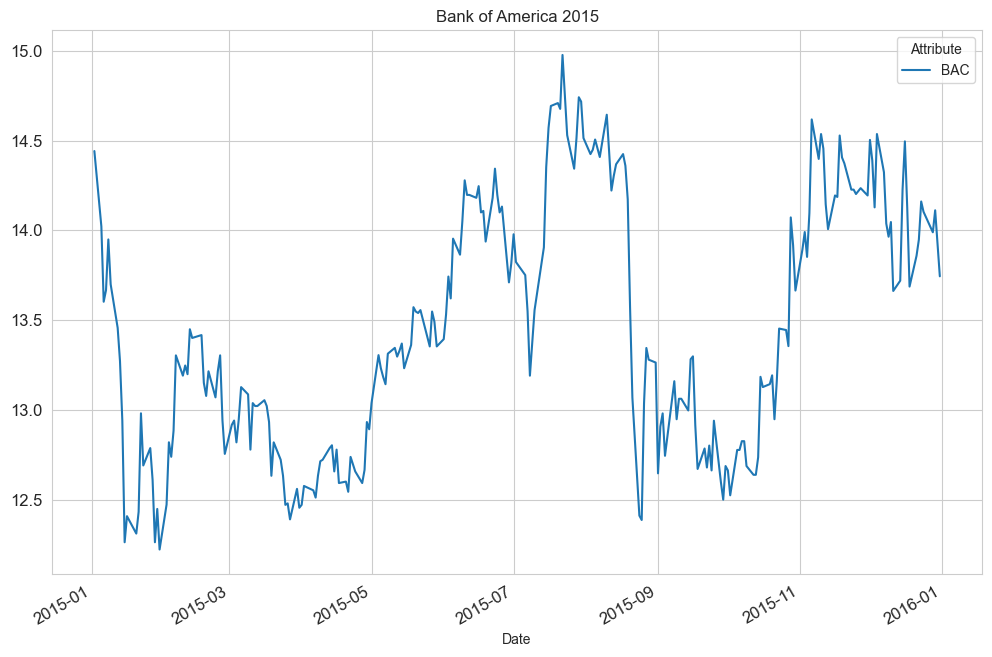

In [51]:
bank_stocks[bank_stocks.index.year==2015]['BAC'].xs(key='Close',level= 'Stock Info', axis=1).plot( title='Bank of America 2015', figsize=(12,8), fontsize=12)

** Use .ta_plot(study='sma') to create a Simple Moving Averages plot of Morgan Stanley for the year 2015.**

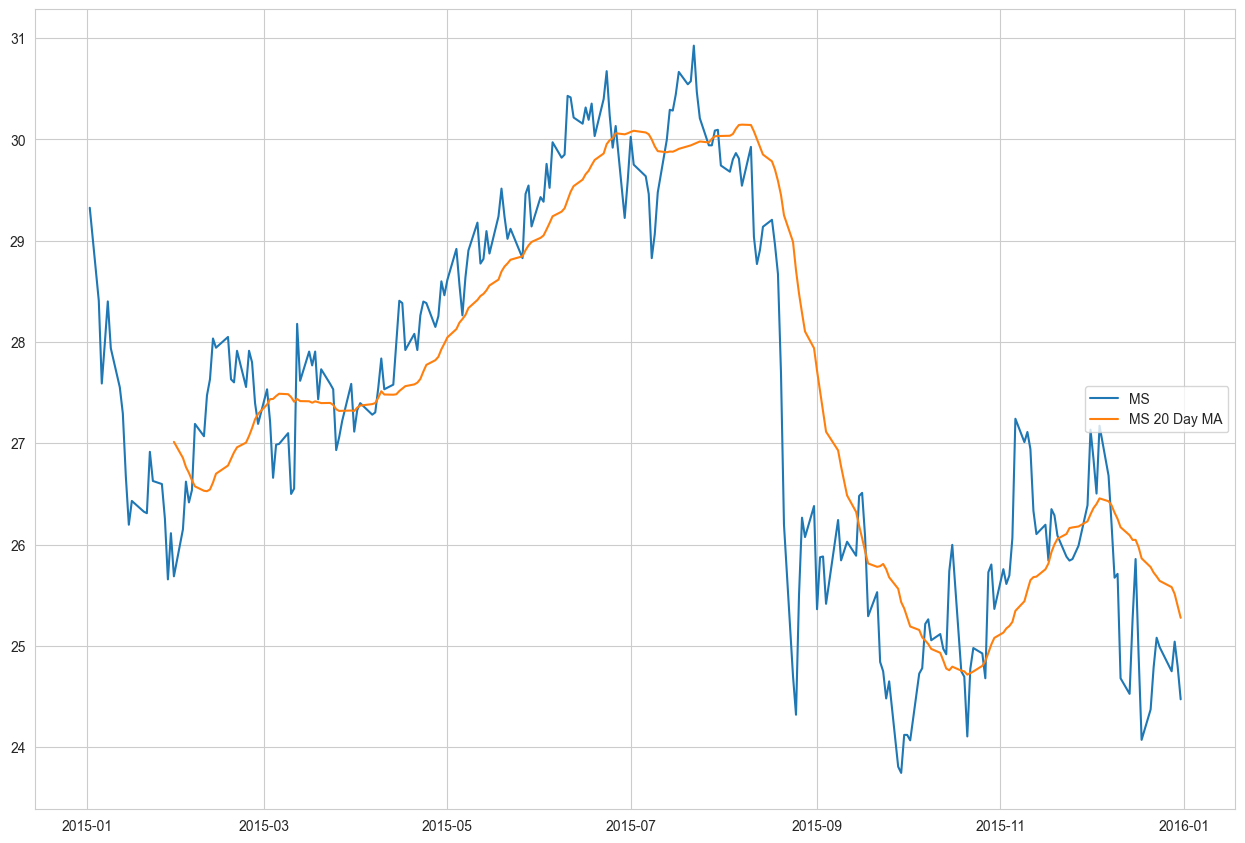

In [88]:
fig = plt.figure(figsize=(12, 8))

bank_stocks_subset = bank_stocks[bank_stocks.index.year==2015]

axes = fig.add_axes([0,0,1,1])
axes.plot(bank_stocks_subset['MS'].xs(key='Close', level='Stock Info', axis=1))
axes.plot(bank_stocks_subset['MS'].rolling(window=20).mean().xs(key='Close', level='Stock Info', axis=1))
axes.legend(['MS', 'MS 20 Day MA'], loc=5)

**Use .ta_plot(study='boll') to create a Bollinger Band Plot for Bank of America for the year 2015.**

In [90]:
### no esta disponilbe esta libreria por que dependia de cuflinks

# Great Job!

Definitely a lot of more specific finance topics here, so don't worry if you didn't understand them all! The only thing you should be concerned with understanding are the basic pandas and visualization oeprations.